In [2]:
import numpy as np
import matplotlib.pyplot as plt
from graphviz import Digraph

## 6.3 Bayesian games

So far we have only dealt with games where the payoffs, actions, and number of agents are known. With Bayesian games we want to account for uncertainty about these. This amounts to basically just having uncertainty about the payoffs. Uncertainty about numbers of agents and actions can be represented as just greater uncertainty about payoffs. In the action case if we don't know whether an agent has 2 or 3 actions available we can simply create a 3 actions model, but allow the possibility that one of the actions has huge negatives and so won't appear in any solution. Similarly if we don't know whether there are 2 or 3 agents we can model the third agent as possibly having rewards which keep their behaviour constant. This will be made clearer later on with the idea of 'types'. 

We assume that beliefs of agents about their payoffs are posteriors, achieved by conditioning a common prior on individual signals. While it is possible to have different priors, using a common prior makes life a lot simpler!

### 6.3.1 Definitions

There are three ways to view Bayesian games:

#### Information sets

Under this view a game consists of set of games with different payoffs and probabilities. Each agent is has their own knowledge about which games they are in (a partition of the games). For example, say we have these 4 games:

| Game | Payoffs (Row, Column)                                | Name                      | Probability |
| ---- | ---------------------------------------------------- | ------------------------- | ----------- |
| 1    | $\begin{bmatrix}2,0 & 0,2 \\ 0,2 & 2,0\end{bmatrix}$ | Matching Pennies (MP)     | 0.2         |
| 2    | $\begin{bmatrix}2,2 & 0,3 \\ 3,0 & 1,1\end{bmatrix}$ | Prisoner's Dilemma (PD)   | 0.3         |
| 3    | $\begin{bmatrix}2,2 & 0,0 \\ 0,0 & 1,1\end{bmatrix}$ | Coordination (Coord)      | 0.4         |
| 4    | $\begin{bmatrix}2,1 & 0,0 \\ 0,0 & 1,2\end{bmatrix}$ | Battle of the Sexes (BoS) | 0.1         |
~
We might then have these partitions:

| Game  | Row player’s information set | Column player’s information set |
| ----- | ---------------------------- | ------------------------------- |
| MP    | {MP, PD}                     | {MP, Coord}                     |
| PD    | {MP, PD}                     | {PD, BoS}                       |
| Coord | {Coord, BoS}                 | {MP, Coord}                     |
| BoS   | {Coord, BoS}                 | {PD, BoS}                       |

Hence a Bayesian game is then just the mixture of these components. Probabilities of games, partitions of games, and the rewards themselves.

#### Extensive form with chance moves

Under this view we add a new player at the start called 'Nature'. We assume Nature makes it's choices at the start. We can then view the above Bayesian game as a tree:

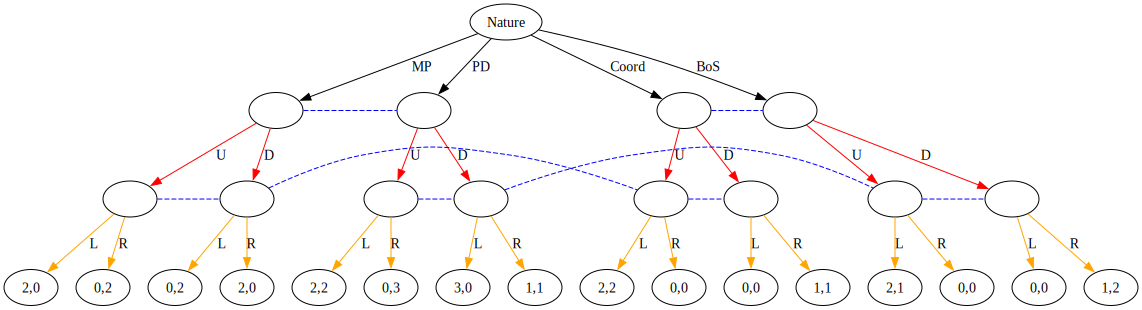

In [10]:
graph = Digraph()
graph.node('Nature', 'Nature')
graph.node('MP', '')
graph.node('PD', '')
graph.node('Coord', '')
graph.node('BoS', '')
graph.edge('Nature', 'MP','MP',color="black")
graph.edge('Nature', 'PD','PD',color="black")
graph.edge('Nature', 'Coord','Coord',color="black")
graph.edge('Nature', 'BoS','BoS',color="black")
graph.edge('MP', 'PD','',color="blue",style="dashed",dir="none")
graph.edge('Coord', 'BoS','',color="blue",style="dashed",dir="none")
with graph.subgraph() as same_rank:
    same_rank.attr(rank='same')
    same_rank.node('MP')
    same_rank.node('PD')
    same_rank.node('Coord')
    same_rank.node('BoS')

# MP branches
graph.node('MP_U', '')
graph.node('MP_D', '')
graph.edge('MP', 'MP_U','U',color="red")
graph.edge('MP', 'MP_D','D',color="red")
graph.node('MP_U_L', '2,0')
graph.node('MP_U_R', '0,2')
graph.node('MP_D_L', '0,2')
graph.node('MP_D_R', '2,0')
graph.edge('MP_U', 'MP_U_L','L',color="orange")
graph.edge('MP_U', 'MP_U_R','R',color="orange")
graph.edge('MP_D', 'MP_D_L','L',color="orange")
graph.edge('MP_D', 'MP_D_R','R',color="orange")

# PD branches
graph.node('PD_U', '')
graph.node('PD_D', '')
graph.edge('PD', 'PD_U','U',color="red")
graph.edge('PD', 'PD_D','D',color="red")

graph.node('PD_U_L', '2,2')
graph.node('PD_U_R', '0,3')
graph.node('PD_D_L', '3,0')
graph.node('PD_D_R', '1,1')
graph.edge('PD_U', 'PD_U_L','L',color="orange")
graph.edge('PD_U', 'PD_U_R','R',color="orange")
graph.edge('PD_D', 'PD_D_L','L',color="orange")
graph.edge('PD_D', 'PD_D_R','R',color="orange")

# Coord branches
graph.node('Coord_U', '')
graph.node('Coord_D', '')
graph.edge('Coord', 'Coord_U','U',color="red")
graph.edge('Coord', 'Coord_D','D',color="red")

graph.node('Coord_U_L', '2,2')
graph.node('Coord_U_R', '0,0')
graph.node('Coord_D_L', '0,0')
graph.node('Coord_D_R', '1,1')
graph.edge('Coord_U', 'Coord_U_L','L',color="orange")
graph.edge('Coord_U', 'Coord_U_R','R',color="orange")
graph.edge('Coord_D', 'Coord_D_L','L',color="orange")
graph.edge('Coord_D', 'Coord_D_R','R',color="orange")

# BoS branches
graph.node('BoS_U', '')
graph.node('BoS_D', '')
graph.edge('BoS', 'BoS_U','U',color="red")
graph.edge('BoS', 'BoS_D','D',color="red")

graph.node('BoS_U_L', '2,1')
graph.node('BoS_U_R', '0,0')
graph.node('BoS_D_L', '0,0')
graph.node('BoS_D_R', '1,2')
graph.edge('BoS_U', 'BoS_U_L','L',color="orange")
graph.edge('BoS_U', 'BoS_U_R','R',color="orange")
graph.edge('BoS_D', 'BoS_D_L','L',color="orange")
graph.edge('BoS_D', 'BoS_D_R','R',color="orange")

with graph.subgraph() as same_rank:
    same_rank.attr(rank='same')
    same_rank.node('MP_U')
    same_rank.node('MP_D')
    same_rank.node('PD_U')
    same_rank.node('PD_D')
    same_rank.node('Coord_U')
    same_rank.node('Coord_D')
    same_rank.node('BoS_U')
    same_rank.node('BoS_D')

graph.edge('MP_U', 'MP_D','',color="blue",style="dashed",dir="none")
graph.edge('MP_D', 'Coord_U','',color="blue",style="dashed",dir="none")
graph.edge('Coord_U', 'Coord_D','',color="blue",style="dashed",dir="none")

graph.edge('PD_U', 'PD_D','',color="blue",style="dashed",dir="none")
graph.edge('PD_D', 'BoS_U','',color="blue",style="dashed",dir="none")
graph.edge('BoS_U', 'BoS_D','',color="blue",style="dashed",dir="none")

display(graph)

This view is very useful for sequential games and games where players can see previous moves, but is more of a pain in other cases.

Finally there is the Epistemic type form. 

#### Epistemic types

With this form we forget about defining individual games. Agents just have actions and we instead extend the utility function to take into account what the agents might know. We extend the utility table to have 'types', where each agent's type comes from a 'type space' given to that agent. There is then a common prior over the types. Here we denote these types by $\theta$.

$
\begin{array}{c|c|c}
\text{Type} & \text{Player} & \text{Belief} \\
\hline
\theta_{1,1} & 1 & \text{MP / PD} \\
\theta_{1,2} & 1 & \text{Coord / BoS} \\
\theta_{2,1} & 2 & \text{MP / Coord} \\
\theta_{2,2} & 2 & \text{PD / BoS} \\
\end{array}
$

We can then define the utility table based on the combined types:

$
\begin{array}{cccccc}
\text{Action 1} & \text{Action 2} & \text{Type 1} & \text{Type 2} & U_1 & U_2 \\
\hline
U & L & \theta_{1,1} & \theta_{2,1} & 2 & 0 \\
U & L & \theta_{1,1} & \theta_{2,2} & 2 & 2 \\
U & L & \theta_{1,2} & \theta_{2,1} & 2 & 2 \\
U & L & \theta_{1,2} & \theta_{2,2} & 2 & 1 \\
U & R & \theta_{1,1} & \theta_{2,1} & 0 & 2 \\
U & R & \theta_{1,1} & \theta_{2,2} & 0 & 3 \\
U & R & \theta_{1,2} & \theta_{2,1} & 0 & 0 \\
U & R & \theta_{1,2} & \theta_{2,2} & 0 & 0 \\
D & L & \theta_{1,1} & \theta_{2,1} & 0 & 2 \\
D & L & \theta_{1,1} & \theta_{2,2} & 3 & 0 \\
D & L & \theta_{1,2} & \theta_{2,1} & 0 & 0 \\
D & L & \theta_{1,2} & \theta_{2,2} & 0 & 0 \\
D & R & \theta_{1,1} & \theta_{2,1} & 2 & 0 \\
D & R & \theta_{1,1} & \theta_{2,2} & 1 & 1 \\
D & R & \theta_{1,2} & \theta_{2,1} & 1 & 1 \\
D & R & \theta_{1,2} & \theta_{2,2} & 1 & 2 \\
\end{array}
$

We can then just look at the joint distribution of the types (our prior) and then know what the value of different actions is. The notion of a pure strategy is also clear here. A pure strategy is a mapping from each type to a single action.

### 6.3.2 Strategies and equilibria

When it comes to Bayesian games we can view the expected utility at 3 different points, *ex post* (knowing everyones' type), *ex interim* (knowing your own type) and *ex ante* (knowing nothing).

**ex post**

To get this we simple get the set of utilities at the current types and do a weighted sum with the probability of the actions. For instance if we know we are in ($\theta_{1,1}$,$\theta_{2,1}$) then we know we are looking at this bit of the table (the MP game):

$
\begin{array}{cccccc}
\text{Action 1} & \text{Action 2} & \text{Type 1} & \text{Type 2} & U_1 & U_2 \\
\hline
U & L & \theta_{1,1} & \theta_{2,1} & 2 & 0 \\
U & R & \theta_{1,1} & \theta_{2,1} & 0 & 2 \\
D & L & \theta_{1,1} & \theta_{2,1} & 0 & 2 \\
D & R & \theta_{1,1} & \theta_{2,1} & 2 & 0 \\
\end{array}
$

Say player 1 is 50:50 for $\theta_{1,1}$ and player 2 is also 50:50 for $\theta_{2,1}$. We can compute the probabilities (0.25,0.25,0.25,0.25) and sum to get the expected utility (1,1).

**ex interim**

For this we do essentially the same as above but weigh by the probability of the other player's type. Say that player 1 is in $\theta_{1,1}$ as before. We also have to consider in addition to the above the other posibility for player 2:

$
\begin{array}{cccccc}
\text{Action 1} & \text{Action 2} & \text{Type 1} & \text{Type 2} & U_1 & U_2 \\
\hline
U & L & \theta_{1,1} & \theta_{2,2} & 2 & 2 \\
U & R & \theta_{1,1} & \theta_{2,2} & 0 & 3 \\
D & L & \theta_{1,1} & \theta_{2,2} & 3 & 0 \\
D & R & \theta_{1,1} & \theta_{2,2} & 1 & 1 \\
\end{array}
$

Let's say player 2 has a different strategy for $\theta_{2,2}$ and instead always goes R. Then the expected utility for this case is (0.5,2). 

We then need to do the expectation over these two options using the marginalized probabilities of the types. We know the inital probabilities were 0.2 and 0.4 for MP and PD. So the marginalized probabilities of $\theta_{2,1}$ and $\theta_{2,2}$ are (1/3) and (2/3). Therefor the ex interim expected utility is (2/3,5/3).

**ex ante**

This follows the same logic. We are just marginalizing over the prior over types.

All this stuff is just marginalizing!

### 6.3.3 Computing equilibria

We can also define a Nash equilibrium for Bayesian games. The definition is fairly straightforward. We just need each player to have a best response given their uncertainty. The strategies are defined at the *ex interim* view level.

Just like the the extensive form we can convert a Bayesian game back into normal form, which makes the Nash concept easier to grasp. Each player's strategy is just what to do in each view. In the above case that means something like LL, or UD. We make the full table and compute the *ex ante* values. If we do that we get:

$
\begin{array}{ccccc}
\text{} & \text{LL} & \text{LR} & \text{RL} & \text{RR} \\
\hline
UU & 2,1 & 1,0.7 & 1,1.2 & 0,0.9 \\
UD & 0.8,0.2 & 1,1.1 & 0.4,1 & 0.6,1.9 \\
DU & 1.5,1.4 & 0.5,1.1 & 1.7,0.4 & 0.7,0.1 \\
DD & 0.3,0.6 & 0.5,1.5 & 1.1,0.2 & 1.3,1.1 \\
\end{array}
$

In this table we can look for our Nash equilbiria.

It is also possible to look at Bayesian games and algorithms from the extensive form, but those aren't covered here.

### 6.3.4 Ex post equilibrium

A final concept worth touching on is the ex post equilibrium. An ex post equilibrium is where the agents wouldn't change their policies even if they knew the full set of types. Many dominant strategy equilibria are also ex post equilibrium, but not always. 